SVM

In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [637]:
from sklearn.datasets import load_iris
data = load_iris()

In [638]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['species']=data.target

In [639]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

In [640]:
df.shape

(150, 5)

In [641]:
df.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [642]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [643]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [644]:
df['species'].unique()

array([0, 1, 2])

In [645]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [646]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [647]:
# df['ID'].drop()
# no ID columns

In [648]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


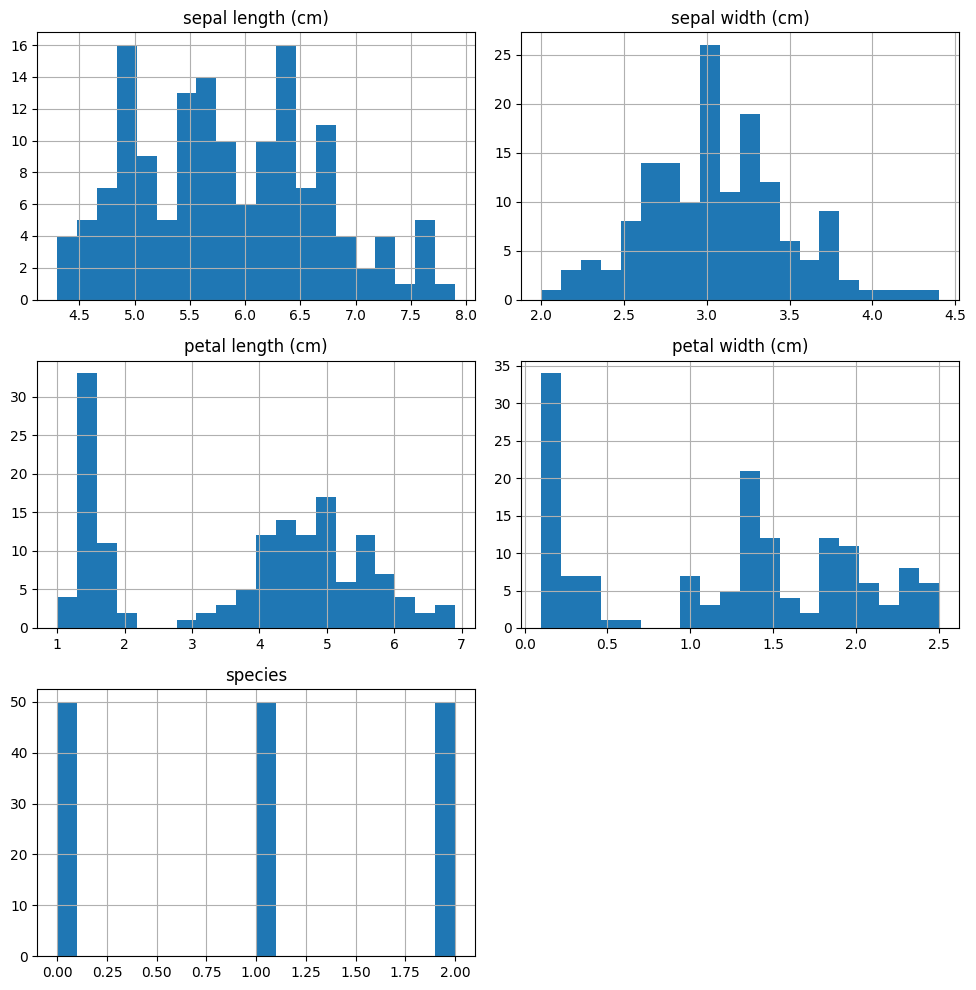

In [649]:
df.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

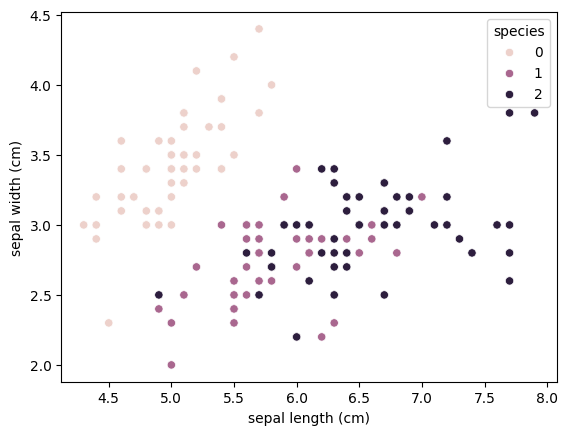

In [650]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='species')
plt.show()

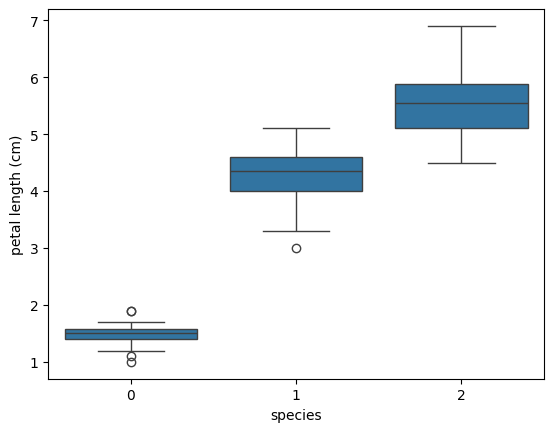

In [651]:
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.show()

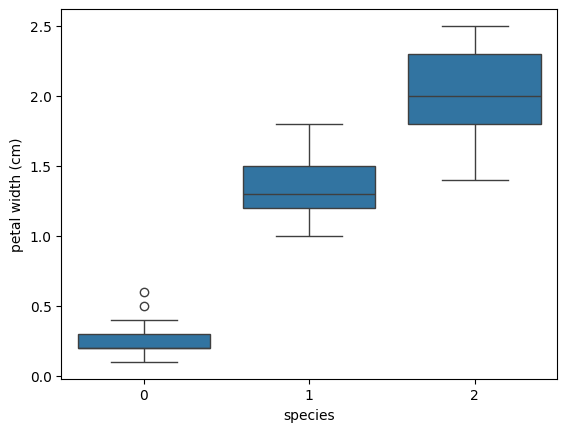

In [652]:
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.show()

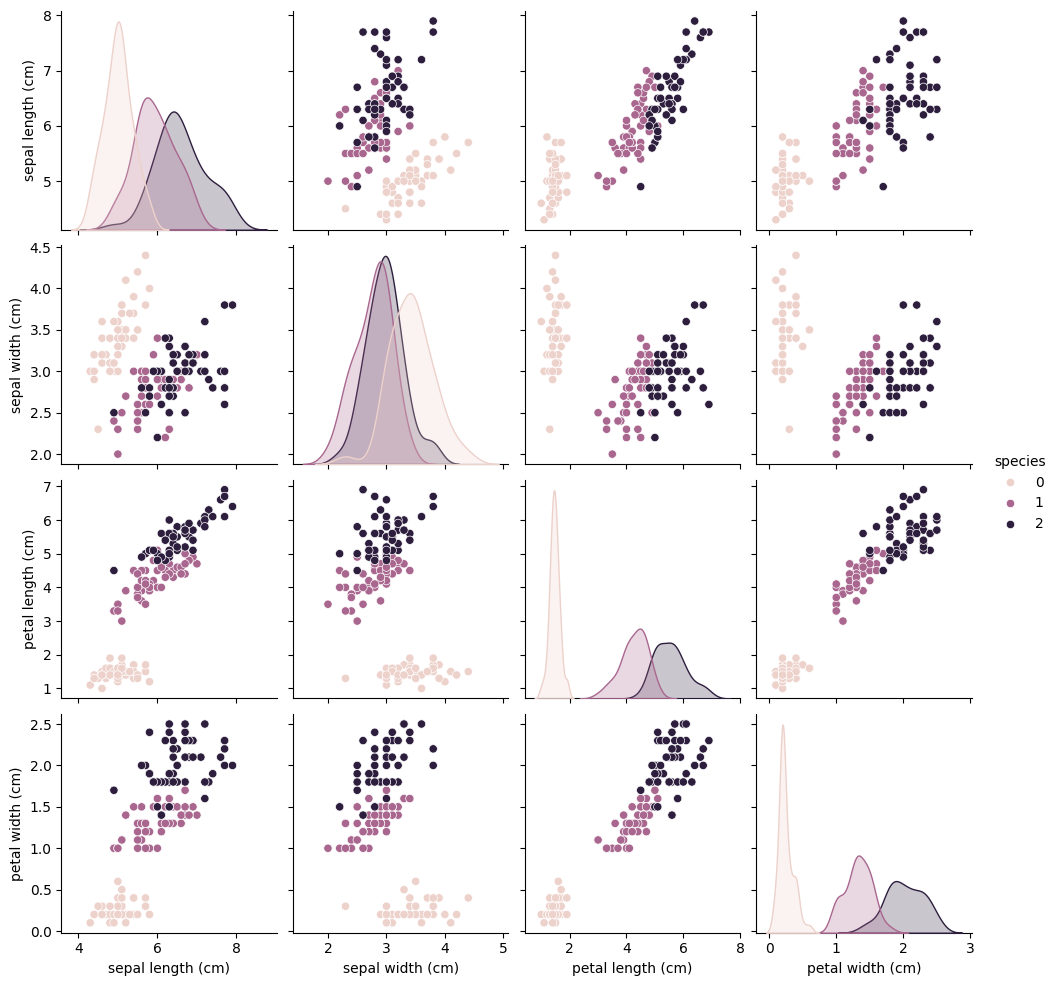

In [653]:
sns.pairplot(df, hue='species')
plt.show()

In [654]:
df.drop(['species'], axis=1).corr() #correlation of different features not species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [655]:
x=df.drop(['species'], axis=1)
y=df['species']

In [656]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [657]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [658]:
from sklearn.svm import SVC
model = SVC(C=1)
model.fit(x_train, y_train)

SVC(C=1)

In [659]:
y_pred = model.predict(x_test)

In [660]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
1.0


Linear Regression

In [661]:
df = pd.read_csv('tvmarketing.csv')

In [662]:
df.shape

(200, 2)

In [663]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [664]:
df.dtypes

TV       float64
Sales    float64
dtype: object

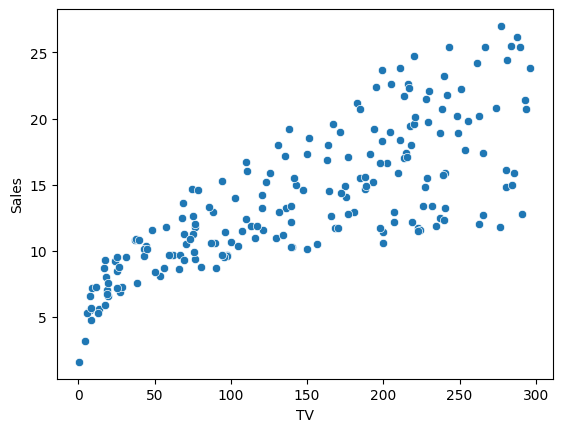

In [665]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()

In [666]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [667]:
x=df[['TV']]
y=df['Sales']

In [668]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [669]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((140, 1), (60, 1), (140,), (60,))

In [670]:
#manual linear regression without using libraries
x_mean=x_train['TV'].mean()
y_mean=y_train.mean()
num = ((x_train['TV']-x_mean)*(y_train-y_mean)).sum()
den = ((x_train['TV']-x_mean)**2).sum()
slope=num/den
intercept=y_mean-slope*x_mean
print(slope, intercept)
#y=mx+c

0.0478039506905179 6.864991740483327


In [671]:
y_pred=slope*x_test['TV']+intercept
y_pred.head()

185    16.664802
140    10.373802
163    14.680938
36     19.623866
53     15.593993
Name: TV, dtype: float64

In [672]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [673]:
y_pred = model.predict(x_test)
y_pred[:5]

array([16.66480163, 10.37380172, 14.68093768, 19.62386618, 15.59399314])

In [674]:
print(model.coef_, model.intercept_)

[0.04780395] 6.864991740483328


In [675]:
print(model.score(x_test, y_test))

0.5032466064887862


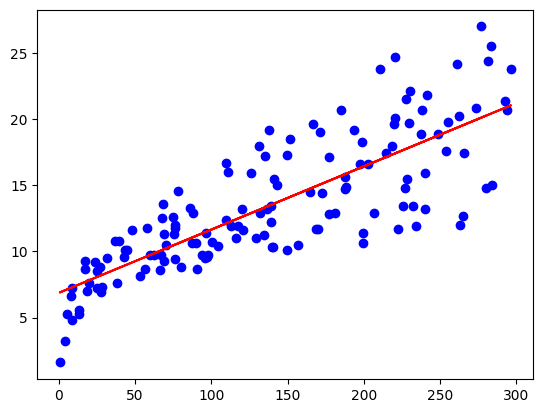

In [676]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.show()

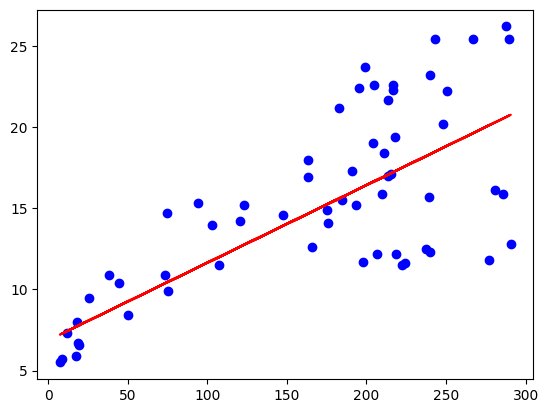

In [677]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, model.predict(x_test), color='red')
plt.show()

In [678]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 15.003789091724109
R2: 0.5032466064887862


Decision Trees

In [679]:
dt=pd.read_csv('train_titanic.csv')

In [680]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [681]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [682]:
dt.shape

(891, 12)

In [683]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

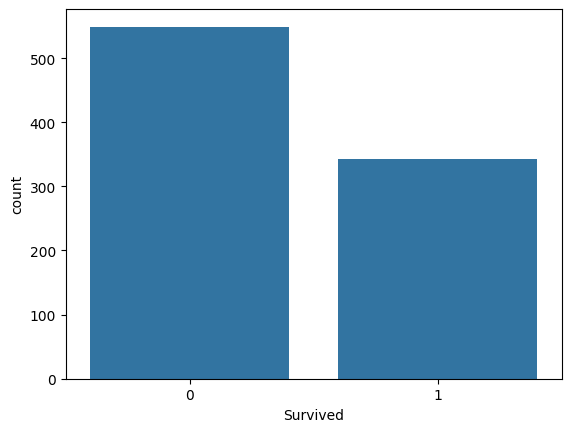

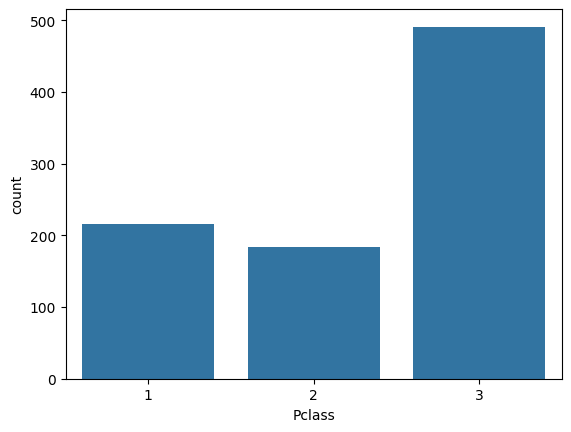

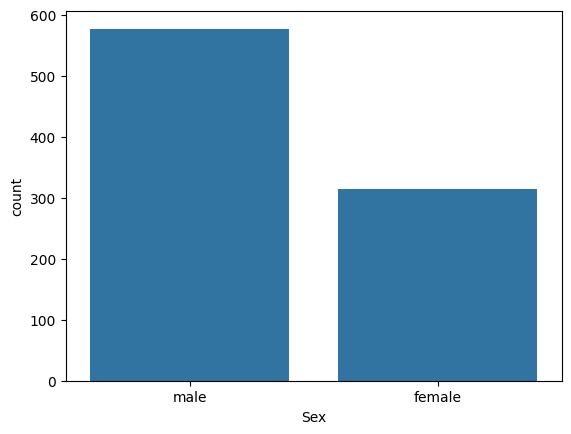

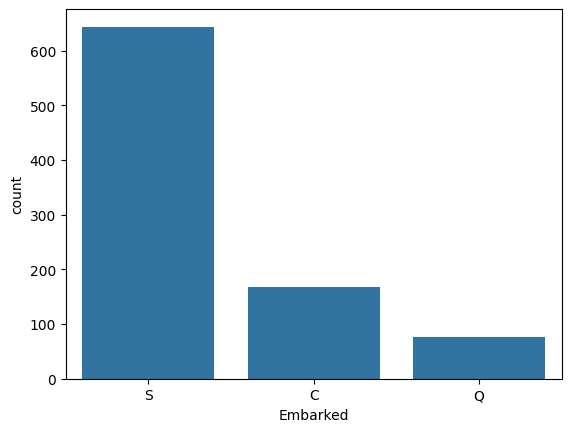

In [684]:
sns.countplot(x='Survived', data=dt)
plt.show()
sns.countplot(x='Pclass', data=dt)
plt.show()
sns.countplot(x='Sex', data=dt)
plt.show()
sns.countplot(x='Embarked', data=dt)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

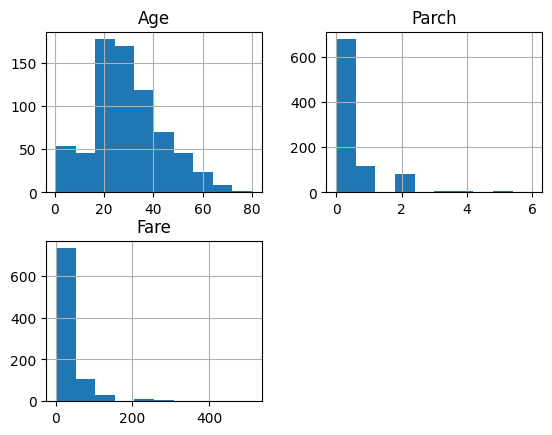

In [685]:
dt[['Age','Parch','Fare']].hist()
plt.show

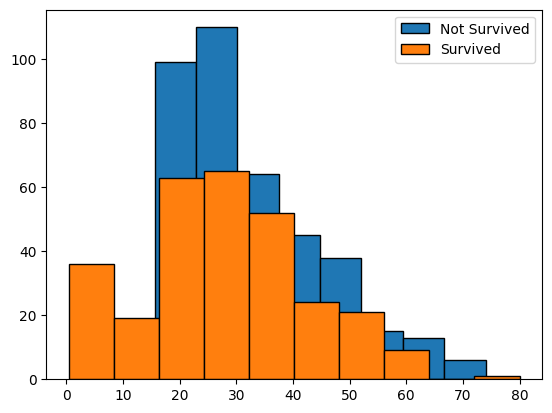

In [686]:
plt.hist(dt[dt['Survived']==0]['Age'], edgecolor='black', label='Not Survived')
plt.hist(dt[dt['Survived']==1]['Age'], edgecolor='black', label='Survived')
plt.legend()
plt.show()

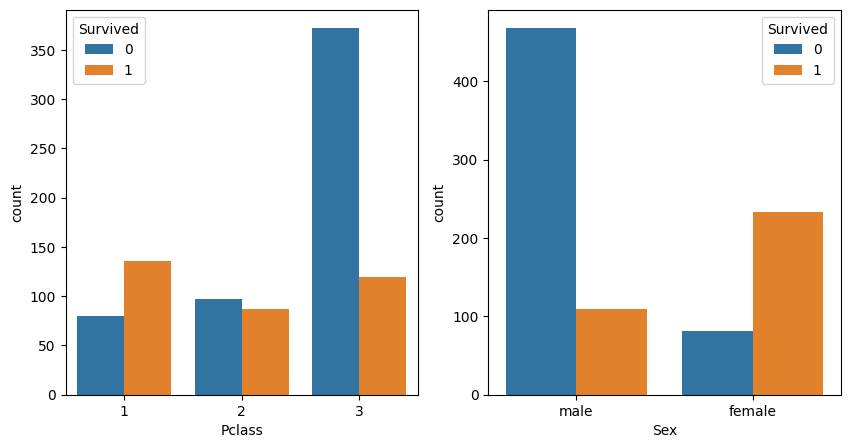

In [687]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=dt, ax=ax[0])
sns.countplot(x='Sex', hue='Survived', data=dt, ax=ax[1])
plt.show()

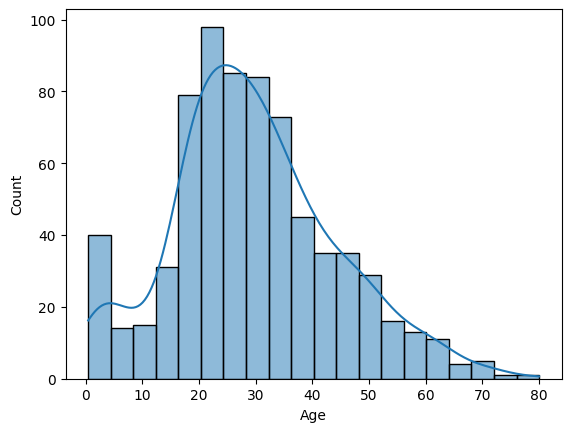

In [688]:
#Histogram of Age of the given data set(sample)
sns.histplot(dt['Age'], edgecolor='black', kde=True)
plt.show()

In [689]:
dt['Embarked'].fillna('S', inplace=True)

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_12564\3947361193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Embarked'].fillna('S', inplace=True)


In [690]:
dt['Fare'].fillna(dt['Fare'].median(), inplace=True)

C:\Users\E.NILESH\AppData\Local\Temp\ipykernel_12564\3201037828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Fare'].fillna(dt['Fare'].median(), inplace=True)


In [691]:
mean, std = dt['Age'].mean(), dt['Age'].std()
dt['Age'] = dt['Age'].apply(lambda x: np.random.normal(mean, std) if pd.isnull(x) else x)

In [692]:
dt['FamilySize'] = dt['SibSp'] + dt['Parch'] + 1
dt['IsAlone'] = (dt['FamilySize'] == 1)
dt['Has_Cabin'] = dt['Cabin'].notnull()

In [693]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,False


In [694]:
dt.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [695]:
# Encode categoricals
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Sex', 'Embarked', 'IsAlone', 'Has_Cabin']
dt[cat_cols] = dt[cat_cols].apply(LabelEncoder().fit_transform)

In [696]:
xd=dt.drop(['Survived'], axis=1)
yd=dt['Survived']

In [697]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# xd['Sex']=lb.fit_transform(xd['Sex'])
# xd['Embarked']=lb.fit_transform(xd['Embarked'])

In [698]:
# xd=pd.concat([xd, pd.get_dummies(xd['Pclass'])], axis=1)
# xd.drop('Pclass', axis=1, inplace=True)

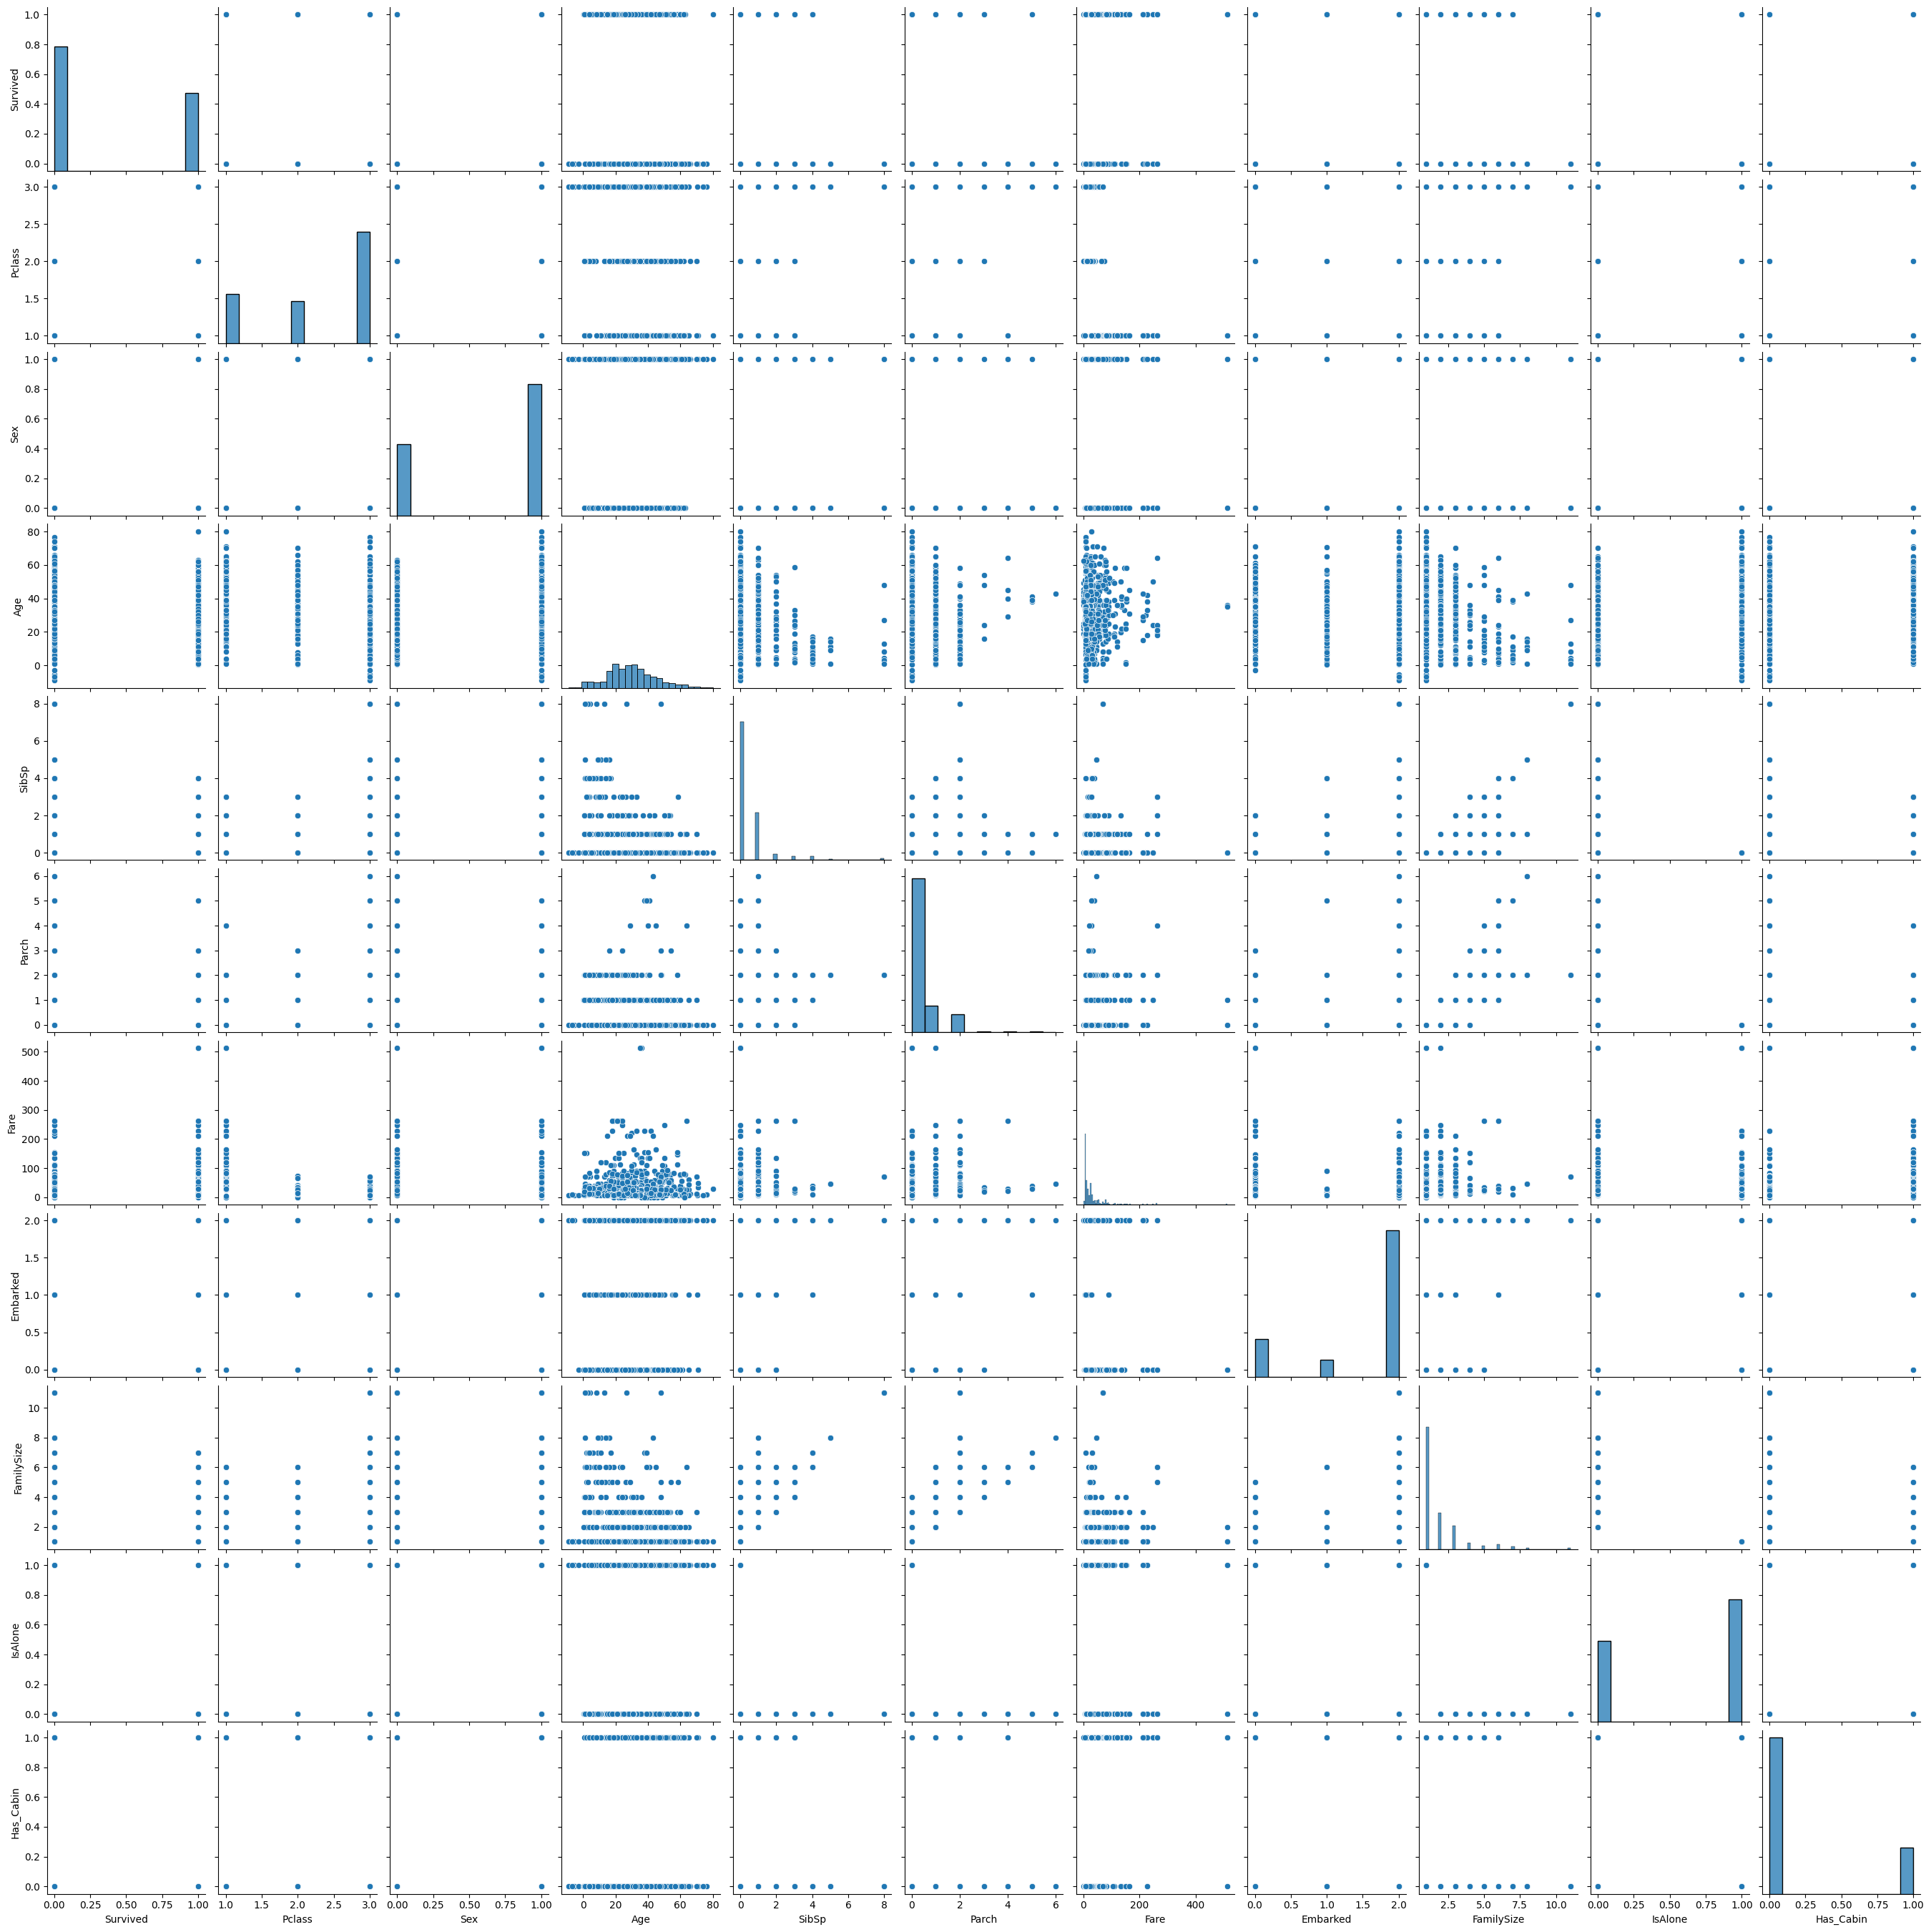

In [699]:
sns.pairplot(dt)
plt.show()

In [700]:
xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size=0.1, random_state=42)

In [701]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model=DecisionTreeClassifier(random_state=42)
model.fit(xd_train, yd_train)

DecisionTreeClassifier(random_state=42)

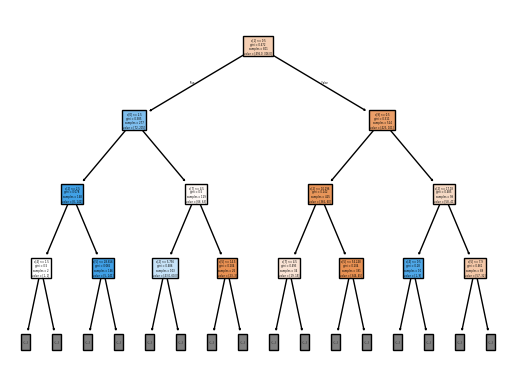

In [702]:
plot_tree(model, filled=True, max_depth=3)
plt.show()

In [703]:
yd_pred=model.predict(xd_test)
print(classification_report(yd_test, yd_pred))
print(accuracy_score(yd_test, yd_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.72      0.86      0.78        36

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90

0.8111111111111111


In [704]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yd_test, yd_pred))

[[42 12]
 [ 5 31]]


KNN

In [705]:
train_data = pd.read_csv("Week7_train.csv")
test_data = pd.read_csv("Week7_test.csv")

In [706]:
train_data.shape, test_data.shape

((42000, 785), (28000, 784))

In [707]:
train_sample = train_data.sample(frac=0.1, random_state=42)

In [708]:
train_sample.shape

(4200, 785)

In [709]:
train_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,210,20,0,0,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [710]:
train_sample['label'].nunique()

10

In [711]:
train_sample['label'].value_counts()

label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64

In [712]:
x=train_sample.drop(['label'], axis=1)
y=train_sample['label']

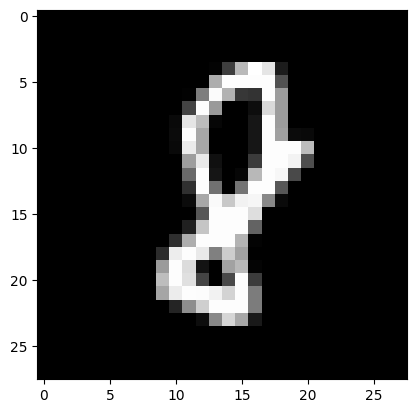

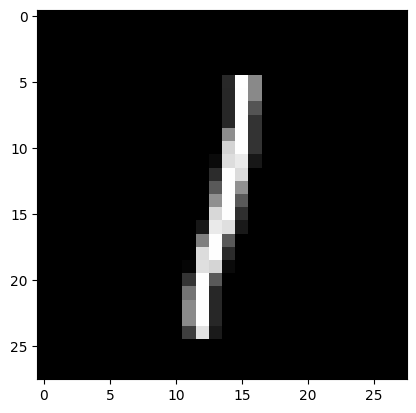

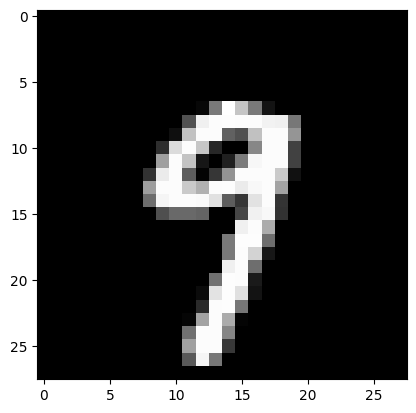

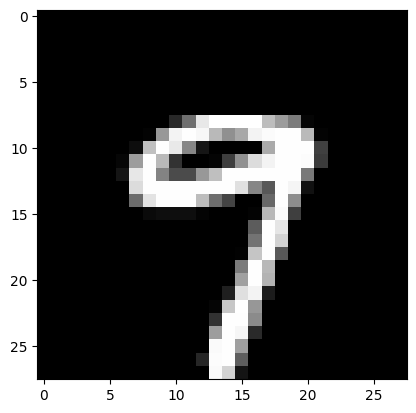

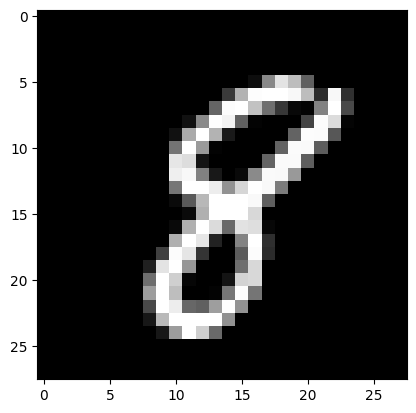

In [713]:
for i in range(5):
    plt.imshow(x.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.show()

In [714]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [715]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [716]:
y_pred=knn.predict(x_test)

In [717]:
confusion_matrix(y_test, y_pred)

array([[ 97,   0,   0,   1,   0,   1,   2,   0,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   6,  81,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   1, 122,   0,   4,   0,   1,   1,   3],
       [  0,   0,   0,   0,  88,   0,   2,   0,   0,   5],
       [  0,   1,   0,   2,   0,  80,   1,   1,   0,   0],
       [  0,   1,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   9,   1,   0,   0,   0,   0, 104,   0,   4],
       [  0,   5,   1,   3,   0,   1,   2,   2,  89,   3],
       [  1,   2,   0,   1,   3,   0,   0,   5,   0,  94]])

In [718]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050



In [719]:
accuracy_score(y_test, y_pred)

0.9247619047619048

Naive Bayes

In [720]:
from sklearn.datasets import fetch_20newsgroups
train=fetch_20newsgroups(subset='train')
test=fetch_20newsgroups(subset='test')

In [721]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [722]:
cat=['alt.atheism', 'comp.graphics', 'sci.space']

In [723]:
train1=fetch_20newsgroups(subset='train', categories=cat)
test1=fetch_20newsgroups(subset='test', categories=cat)

In [724]:
train1.target_names

['alt.atheism', 'comp.graphics', 'sci.space']

In [725]:
print(train1.data[4])

From: henry@zoo.toronto.edu (Henry Spencer)
Subject: Re: TRUE "GLOBE", Who makes it?
Organization: U of Toronto Zoology
Lines: 12

In article <bill.047m@xpresso.UUCP> bill@xpresso.UUCP (Bill Vance) writes:
>It has been known for quite a while that the earth is actually more pear
>shaped than globular/spherical.  Does anyone make a "globe" that is accurate
>as to actual shape, landmass configuration/Long/Lat lines etc.?

I don't think you're going to be able to see the differences from a sphere
unless they are greatly exaggerated.  Even the equatorial bulge is only
about 1 part in 300 -- you'd never notice a 1mm error in a 30cm globe --
and the other deviations from spherical shape are much smaller.
-- 
SVR4 resembles a high-speed collision   | Henry Spencer @ U of Toronto Zoology
between SVR3 and SunOS.    - Dick Dunn  |  henry@zoo.toronto.edu  utzoo!henry



In [726]:
print("Train data", len(train1.data))
print("Test data",  len(test1.target))

Train data 1657
Test data 1102


In [727]:
train1.filenames[:5]

array(['C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60869',
       'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38633',
       'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\53534',
       'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38516',
       'C:\\Users\\E.NILESH\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61210'],
      dtype='<U98')

In [728]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
xt_train = vectorizer.fit_transform(train1.data)

In [729]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
bnb = BernoulliNB()
bnb.fit(xt_train, train1.target)

BernoulliNB()

In [730]:
xt_test=vectorizer.transform(test1.data)

In [731]:
yt_pred=bnb.predict(xt_test)

In [732]:
print(accuracy_score(test1.target, yt_pred))

0.852994555353902


In [733]:
tfidf=TfidfVectorizer()
xt_train=tfidf.fit_transform(train1.data)
xt_test=tfidf.transform(test1.data)

In [734]:
mnb=MultinomialNB()
mnb.fit(xt_train, train1.target)

MultinomialNB()

In [735]:
yt_pred=mnb.predict(xt_test)

In [736]:
accuracy_score(test1.target, yt_pred)

0.9473684210526315

In [737]:
#Try with avoiding stopwords and repeat the same
tfidf = TfidfVectorizer(stop_words='english')
xt_train = tfidf.fit_transform(train1.data)
xt_test = tfidf.transform(test1.data)

mnb = MultinomialNB()
mnb.fit(xt_train, train1.target)

yt_pred = mnb.predict(xt_test)
print(accuracy_score(test1.target, yt_pred))

0.9555353901996371
